In [34]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all logs, 1 = info, 2 = warnings, 3 = errors

Data Setup

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.signal import butter, filtfilt
from scipy.stats import zscore
import pywt

In [ ]:
file_path = "../datasets/adhdata.csv"
df = pd.read_csv(file_path)

print("Data Loaded Successfully")

Data Loaded Successfully


In [37]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166383 entries, 0 to 2166382
Data columns (total 21 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Fp1     float64
 1   Fp2     float64
 2   F3      float64
 3   F4      float64
 4   C3      float64
 5   C4      float64
 6   P3      float64
 7   P4      float64
 8   O1      float64
 9   O2      float64
 10  F7      float64
 11  F8      float64
 12  T7      float64
 13  T8      float64
 14  P7      float64
 15  P8      float64
 16  Fz      float64
 17  Cz      float64
 18  Pz      float64
 19  Class   object 
 20  ID      object 
dtypes: float64(19), object(2)
memory usage: 347.1+ MB
None


In [38]:
df.columns

Index(['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7',
       'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz', 'Class', 'ID'],
      dtype='object')

In [39]:
print("First 5 Rows of the Dataset:")
print(df.head())

First 5 Rows of the Dataset:
     Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  ...  \
0  261.0  402.0   16.0  261.0  126.0  384.0  126.0  236.0   52.0  236.0  ...   
1  121.0  191.0  -94.0   85.0   16.0  200.0  126.0   52.0  347.0  273.0  ...   
2  -55.0   85.0 -204.0   15.0  -57.0  200.0   52.0  126.0  236.0  200.0  ...   
3  191.0   85.0   52.0   50.0   89.0  236.0  163.0   89.0   89.0   89.0  ...   
4  -55.0 -125.0 -204.0 -160.0 -204.0   16.0 -241.0 -241.0   89.0   16.0  ...   

      F8     T7     T8     P7     P8     Fz     Cz     Pz  Class    ID  
0   16.0  200.0  494.0  126.0  236.0  121.0  367.0  121.0   ADHD  v10p  
1  -57.0  126.0  347.0   52.0   52.0   15.0  121.0  -19.0   ADHD  v10p  
2  -94.0  126.0  420.0   52.0  126.0  -55.0  261.0   85.0   ADHD  v10p  
3  -57.0  236.0  420.0  126.0  126.0   15.0   85.0  -55.0   ADHD  v10p  
4 -131.0   89.0  310.0  -57.0   52.0  -55.0   15.0 -336.0   ADHD  v10p  

[5 rows x 21 columns]


In [40]:
print("Class Distribution:")
print(df['Class'].value_counts())

Class Distribution:
ADHD       1207069
Control     959314
Name: Class, dtype: int64


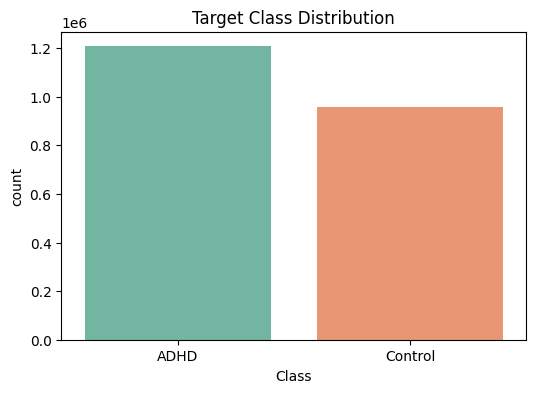

In [41]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', palette='Set2')
plt.title("Target Class Distribution")
plt.show()

In [42]:
missing_total = df.isnull().sum().sum()
print(f"Missing Values: {missing_total} cells")

Missing Values: 0 cells


In [43]:
if missing_total > 0:
    print("Missing Values Per Column:")
    print(df.isnull().sum())

print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
                Fp1           Fp2            F3            F4            C3  \
count  2.166383e+06  2.166383e+06  2.166383e+06  2.166383e+06  2.166383e+06   
mean   1.360903e+02  1.361619e+02  1.422117e+02  1.361022e+02  1.422737e+02   
std    2.755497e+02  2.755136e+02  2.206503e+02  2.133873e+02  2.234852e+02   
min   -3.786000e+03 -1.322400e+04 -3.921000e+03 -1.323700e+04 -3.921000e+03   
25%    1.500000e+01  1.500000e+01  5.200000e+01  1.500000e+01  5.200000e+01   
50%    1.210000e+02  1.210000e+02  1.260000e+02  1.210000e+02  1.260000e+02   
75%    2.610000e+02  2.260000e+02  2.360000e+02  2.260000e+02  2.360000e+02   
max    1.381300e+04  4.802000e+03  5.020000e+03  4.802000e+03  5.430000e+03   

                 C4            P3            P4            O1            O2  \
count  2.166383e+06  2.166383e+06  2.166383e+06  2.166383e+06  2.166383e+06   
mean   1.422005e+02  1.422755e+02  1.419608e+02  1.419823e+02  1.416007e+02   
std    2.107195e+02  2.3018

In [44]:
df['Class'].unique()

array(['ADHD', 'Control'], dtype=object)

In [45]:
df['ID'].unique()

array(['v10p', 'v12p', 'v14p', 'v15p', 'v173', 'v18p', 'v19p', 'v1p',
       'v20p', 'v21p', 'v22p', 'v24p', 'v25p', 'v27p', 'v28p', 'v29p',
       'v30p', 'v31p', 'v32p', 'v33p', 'v34p', 'v35p', 'v36p', 'v37p',
       'v38p', 'v39p', 'v3p', 'v40p', 'v6p', 'v8p', 'v177', 'v179',
       'v181', 'v183', 'v190', 'v196', 'v198', 'v200', 'v204', 'v206',
       'v209', 'v213', 'v215', 'v219', 'v227', 'v231', 'v234', 'v236',
       'v238', 'v244', 'v246', 'v250', 'v254', 'v263', 'v265', 'v270',
       'v274', 'v279', 'v284', 'v286', 'v288', 'v107', 'v108', 'v109',
       'v110', 'v111', 'v112', 'v113', 'v114', 'v115', 'v116', 'v41p',
       'v42p', 'v43p', 'v44p', 'v45p', 'v46p', 'v47p', 'v48p', 'v49p',
       'v50p', 'v51p', 'v52p', 'v53p', 'v54p', 'v55p', 'v56p', 'v57p',
       'v58p', 'v59p', 'v60p', 'v117', 'v118', 'v120', 'v121', 'v123',
       'v125', 'v127', 'v129', 'v131', 'v133', 'v134', 'v138', 'v140',
       'v143', 'v147', 'v149', 'v151', 'v297', 'v298', 'v299', 'v300',
       'v3

Data Visualization

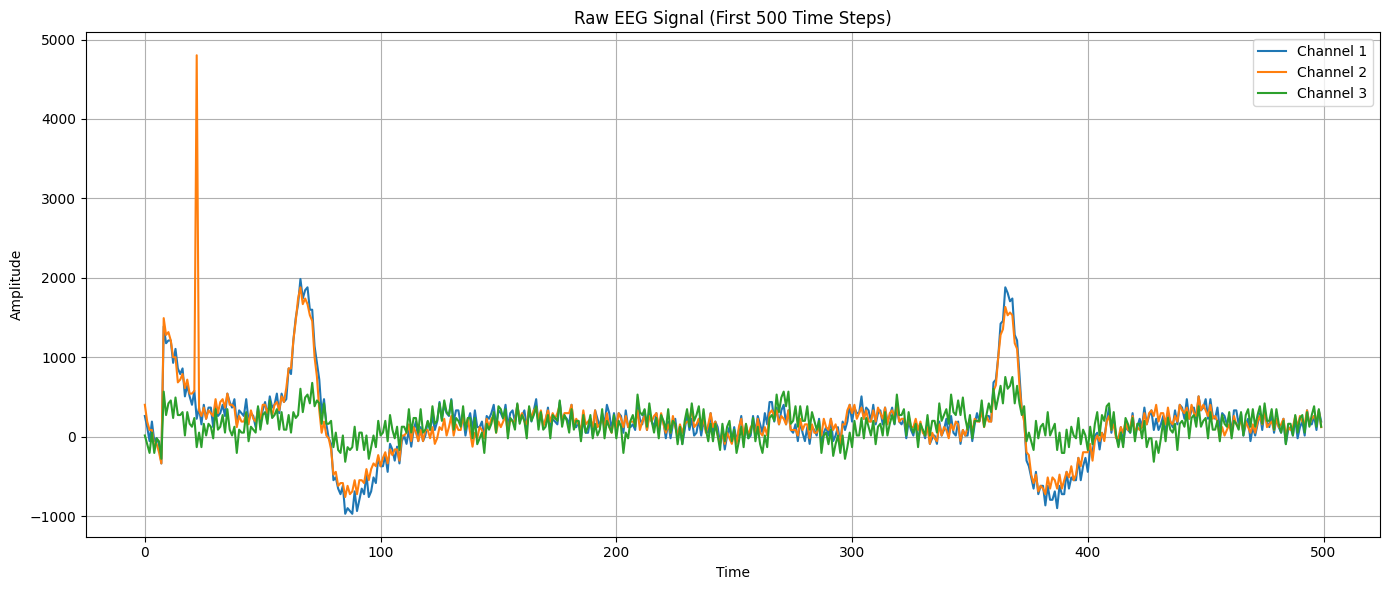

In [46]:
signal_data = df.drop(columns=["Class"])

plt.figure(figsize=(14, 6))
for i in range(3):
    plt.plot(signal_data.iloc[:, i][:500], label=f'Channel {i+1}')
plt.title("Raw EEG Signal (First 500 Time Steps)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

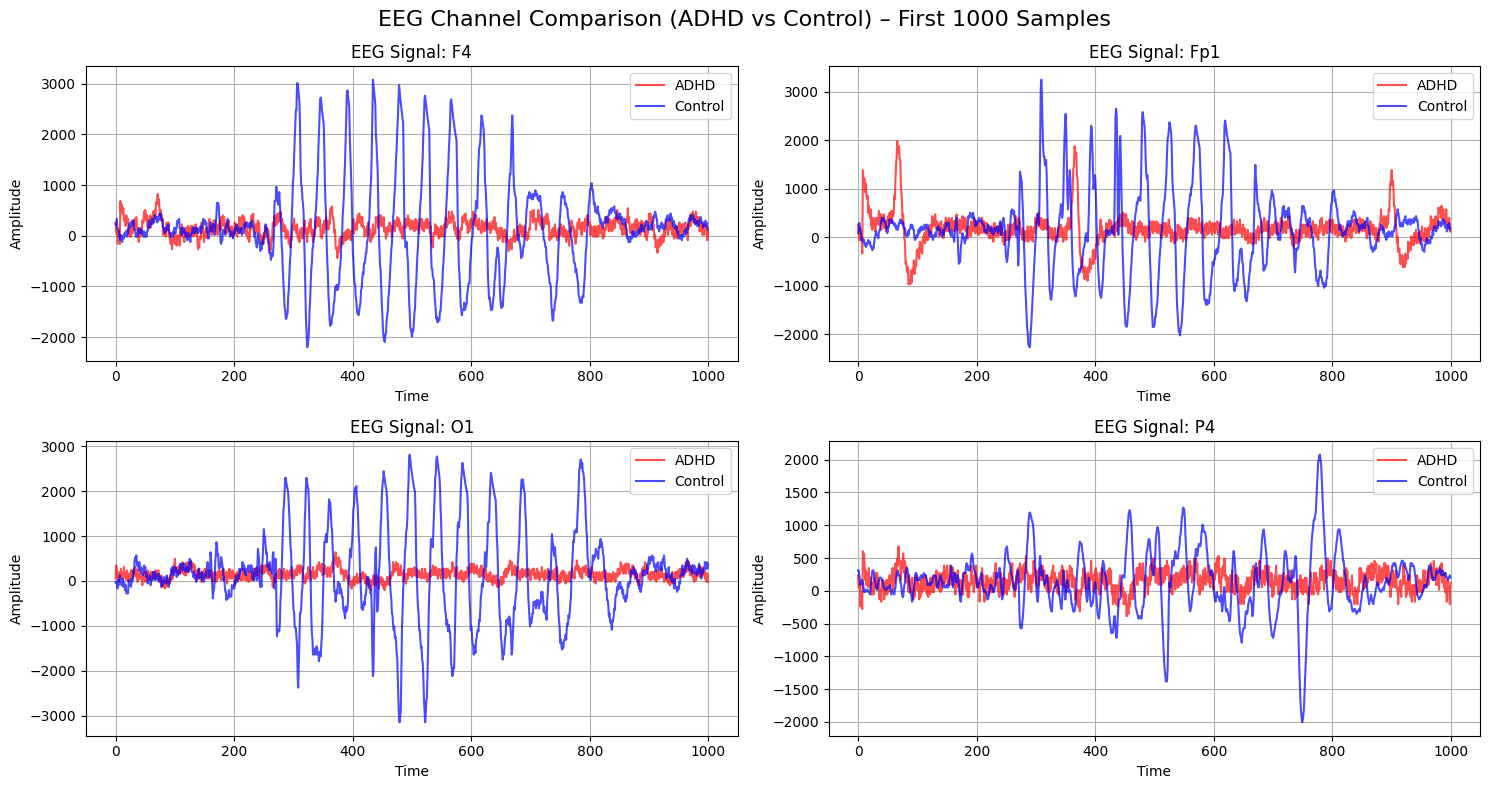

In [47]:
eeg_channels = [col for col in df.columns if col != 'Class']

adhd_data = df[df['Class'] == "ADHD"]
control_data = df[df['Class'] == "Control"]

random.seed(42)
selected_channels = random.sample(eeg_channels, 4)

plt.figure(figsize=(15, 8))
for i, ch in enumerate(selected_channels):
    plt.subplot(2, 2, i + 1)
    plt.plot(adhd_data[ch].values[:1000], label='ADHD', alpha=0.7, color='red')
    plt.plot(control_data[ch].values[:1000], label='Control', alpha=0.7, color='blue')
    plt.title(f"EEG Signal: {ch}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)

plt.suptitle("EEG Channel Comparison (ADHD vs Control) – First 1000 Samples", fontsize=16)
plt.tight_layout()
plt.show()

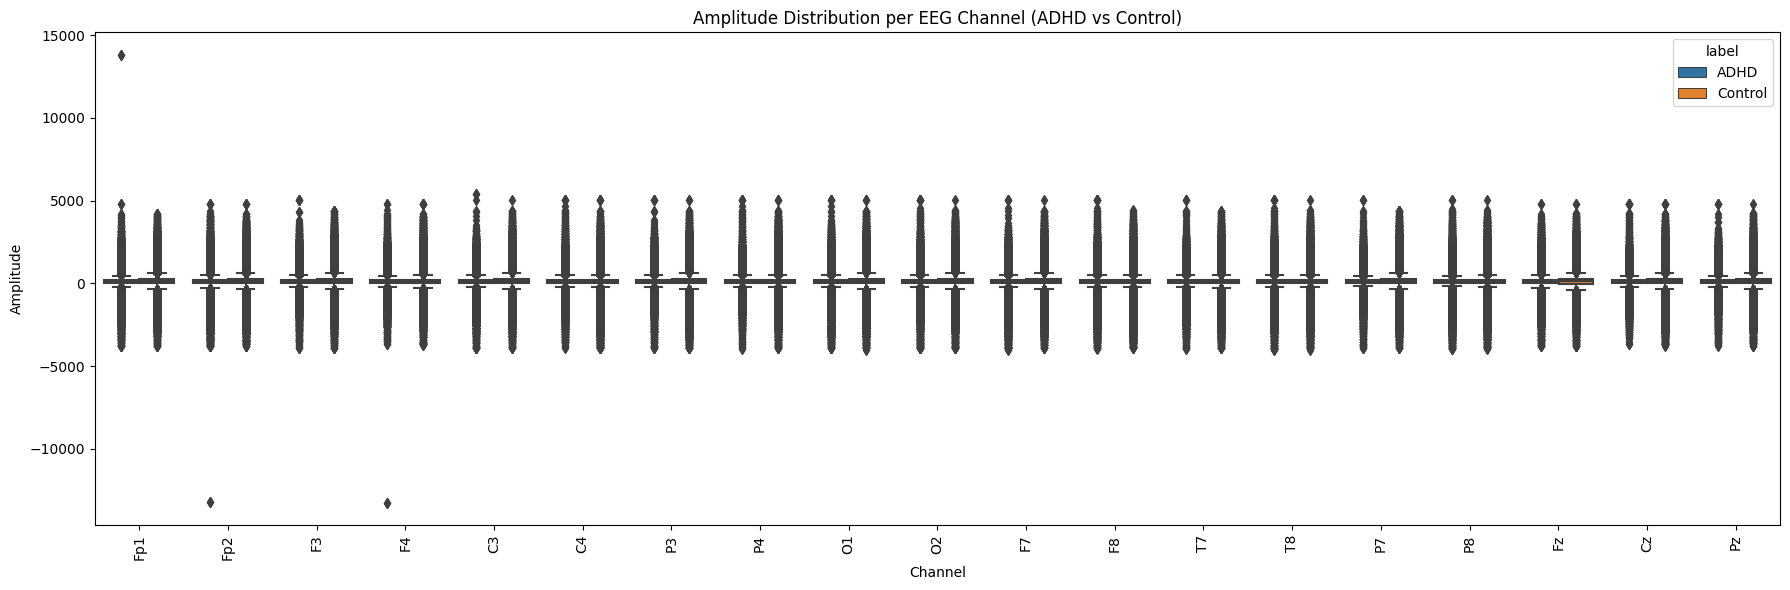

In [48]:
adhd_labeled = adhd_data[eeg_channels].copy()
adhd_labeled['label'] = 'ADHD'

control_labeled = control_data[eeg_channels].copy()
control_labeled['label'] = 'Control'

combined_data = pd.concat([adhd_labeled, control_labeled], ignore_index=True)
melted = pd.melt(combined_data, id_vars='label', value_vars=eeg_channels,
                 var_name='Channel', value_name='Amplitude')

melted['Amplitude'] = pd.to_numeric(melted['Amplitude'], errors='coerce')

melted.dropna(inplace=True)

# Plot
plt.figure(figsize=(18, 6))
sns.boxplot(x='Channel', y='Amplitude', hue='label', data=melted)
plt.xticks(rotation=90)
plt.title("Amplitude Distribution per EEG Channel (ADHD vs Control)")
plt.tight_layout()
plt.show()

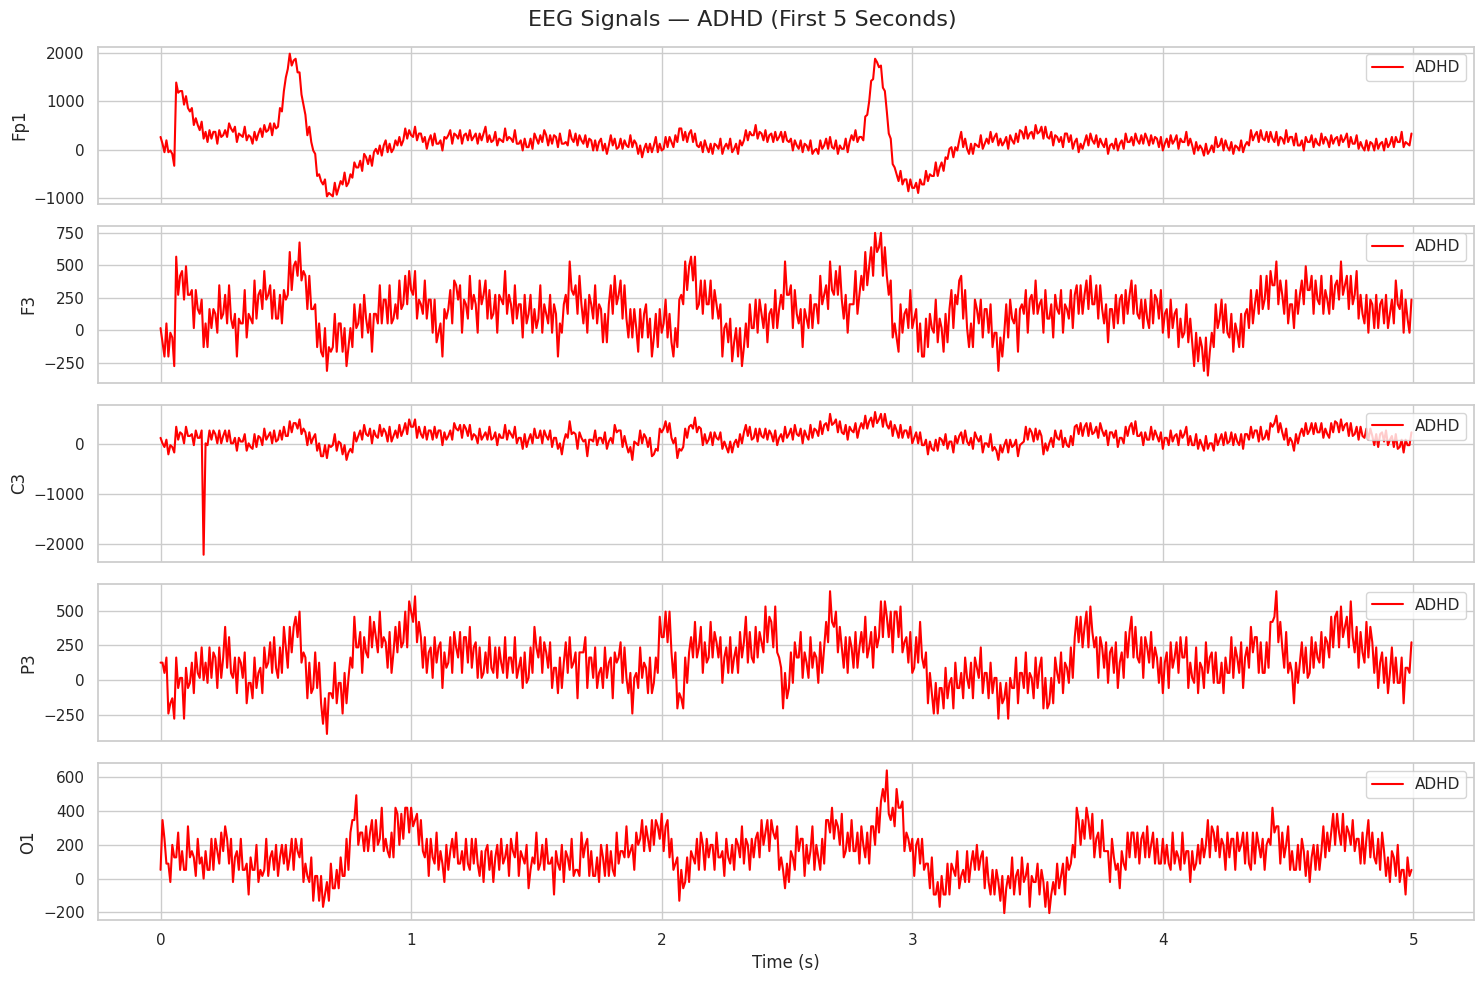

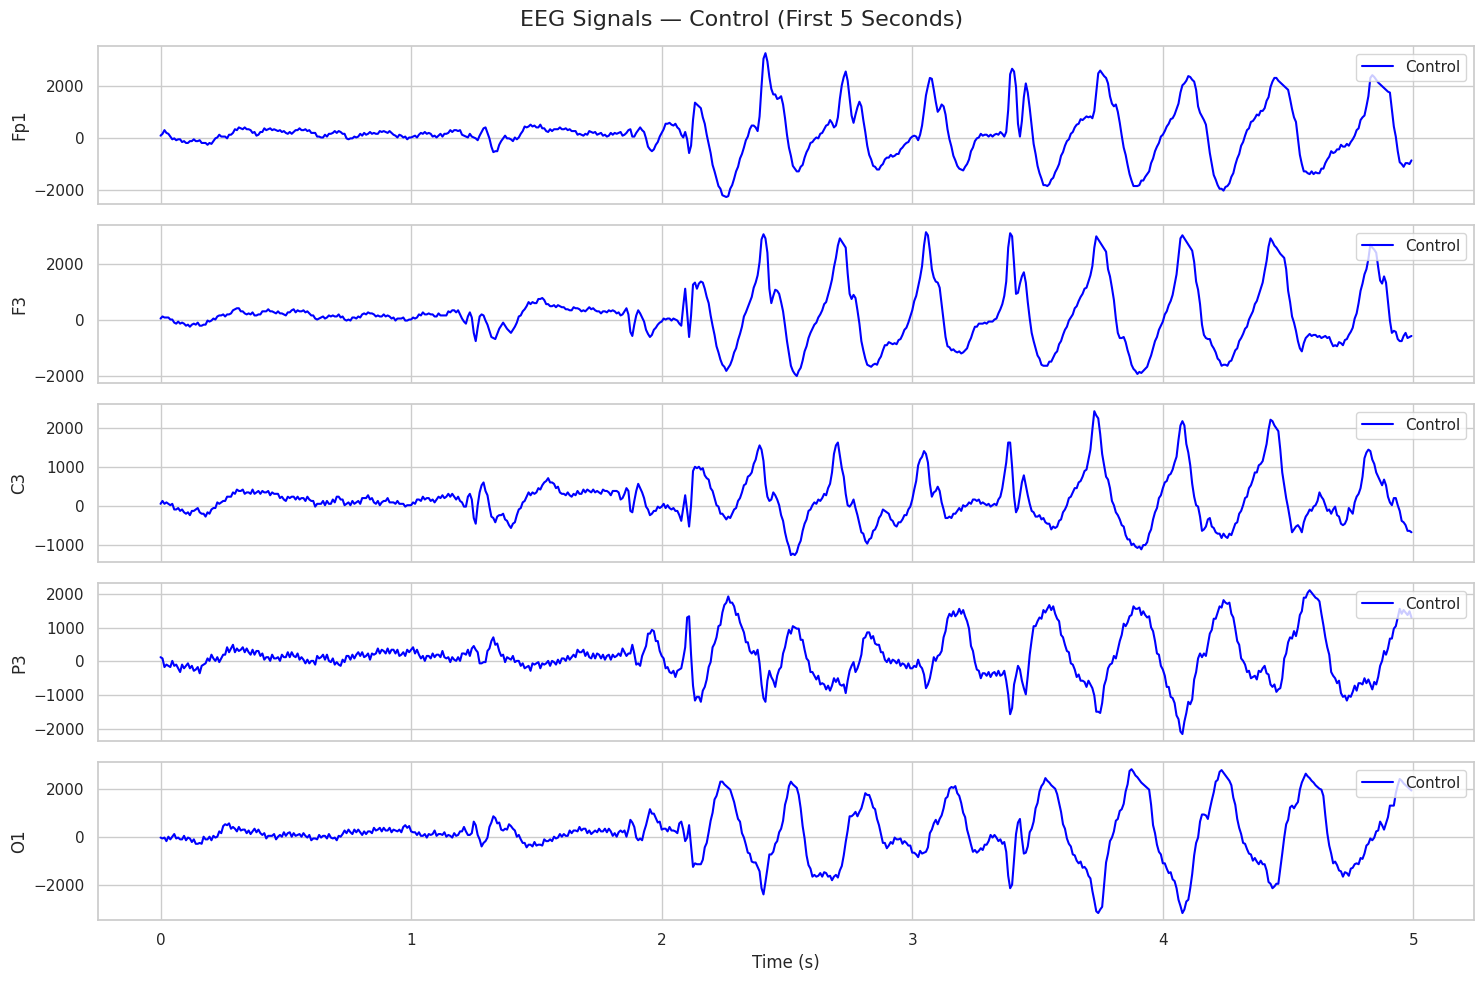

In [49]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)

# Sampling frequency (Hz)
fs = 128

adhd_data = df[df['Class'] == 'ADHD'].reset_index(drop=True)
control_data = df[df['Class'] == 'Control'].reset_index(drop=True)

channels_to_plot = ['Fp1', 'F3', 'C3', 'P3', 'O1']
duration_secs = 5
samples = fs * duration_secs

fig, axs = plt.subplots(len(channels_to_plot), 1, sharex=True, figsize=(15, 10))
for i, ch in enumerate(channels_to_plot):
    axs[i].plot(np.arange(samples) / fs, adhd_data[ch][:samples], label='ADHD', color='red')
    axs[i].set_ylabel(ch)
    axs[i].legend(loc='upper right')
axs[-1].set_xlabel('Time (s)')
fig.suptitle('EEG Signals — ADHD (First 5 Seconds)', fontsize=16)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(len(channels_to_plot), 1, sharex=True, figsize=(15, 10))
for i, ch in enumerate(channels_to_plot):
    axs[i].plot(np.arange(samples) / fs, control_data[ch][:samples], label='Control', color='blue')
    axs[i].set_ylabel(ch)
    axs[i].legend(loc='upper right')
axs[-1].set_xlabel('Time (s)')
fig.suptitle('EEG Signals — Control (First 5 Seconds)', fontsize=16)
plt.tight_layout()
plt.show()

Raw Data Preprocessing

In [50]:
fs = 128.0  # Sampling frequency in Hz
lowcut = 0.5
highcut = 60
order = 4
window_duration = 2
window_size = int(window_duration * fs)
overlap = 0.5
step_size = int(window_size * (1 - overlap))

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')
    padlen = 0 if data.shape[0] <= 21 else 19
    return filtfilt(b, a, data, padlen=padlen)

def wavelet_denoise(signal, wavelet='db4', level=1):
    coeffs = pywt.wavedec(signal, wavelet, mode="per")
    sigma = (1 / 0.6745) * np.median(np.abs(coeffs[-level]))
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    coeffs[1:] = [pywt.threshold(c, value=uthresh, mode='soft') for c in coeffs[1:]]
    return pywt.waverec(coeffs, wavelet, mode="per")[:len(signal)] 

def normalize_signal(signal):
    return zscore(signal)

def create_epochs(multichannel_signal, label, window_size, step_size):
    segments = []
    labels = []
    num_samples = multichannel_signal.shape[0]
    for start in range(0, num_samples - window_size + 1, step_size):
        end = start + window_size
        segment = multichannel_signal[start:end, :] 
        segments.append(segment)
        labels.append(label)
    return segments, labels

channels = ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2',
            'F7', 'F8', 'T7', 'T8', 'P7', 'P8', 'Fz', 'Cz', 'Pz'] 

all_segments = []
all_labels = []

for subject_id, group in df.groupby('ID'):
    # print(f"Processing subject: {subject_id}")

    signal_matrix = []

    for ch in channels:
        raw = group[ch].values

        filtered = butter_bandpass_filter(raw, lowcut, highcut, fs, order)
        denoised = wavelet_denoise(filtered)
        normalized = normalize_signal(denoised)

        signal_matrix.append(normalized)

    signal_matrix = np.stack(signal_matrix, axis=-1)

    label = group["Class"].iloc[0]
    segments, labels = create_epochs(signal_matrix, label, window_size, step_size)

    all_segments.extend(segments)
    all_labels.extend(labels)

X_processed = np.array(all_segments)
y_processed = np.array(all_labels)

print(f"Preprocessing Complete.")
print(f"X shape: {X_processed.shape}, y shape: {y_processed.shape}")


Preprocessing Complete.
X shape: (16749, 256, 19), y shape: (16749,)


Time Series Based Model

In [51]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datetime

In [52]:
y_processed[0]

'Control'

In [53]:
le = LabelEncoder()
y_encoded = le.fit_transform(y_processed)

In [54]:
y_encoded[0]

1

In [55]:
# ADHD - 0 Control - 1

In [56]:
random.seed(42)
# First split: Train+Val and Test (80% train+val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Second split: Train and Val from the remaining 80%
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

num_classes = len(np.unique(y_encoded))
print(f"Number of classes: {num_classes}")


Train shape: (10719, 256, 19), (10719,)
Validation shape: (2680, 256, 19), (2680,)
Test shape: (3350, 256, 19), (3350,)
Number of classes: 2


In [57]:
y_train.shape

(10719,)

In [58]:
def build_cnn_lstm_model(input_shape=(256, 19), num_classes=4):
    inputs = Input(shape=input_shape)

    x = Conv1D(64, kernel_size=5, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = Conv1D(128, kernel_size=3, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = LSTM(64, return_sequences=False)(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)

    outputs = Dense(1, activation='sigmoid')(x)

    return Model(inputs, outputs)

In [59]:
model = build_cnn_lstm_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 19)]         0         
                                                                 
 conv1d (Conv1D)             (None, 256, 64)           6144      
                                                                 
 batch_normalization (BatchN  (None, 256, 64)          256       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 256, 64)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 128, 64)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 128)          2470

In [60]:
log_dir = f"logs/timeseries/{datetime.datetime.now().strftime('%Y%m%d-%H%M%S')}"
tensorboard_cb = TensorBoard(log_dir=log_dir)

checkpoint_cb = ModelCheckpoint(
    'best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max'
)

earlystop_cb = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[checkpoint_cb, earlystop_cb, tensorboard_cb]
)


Epoch 1/50
168/168 [==============================] - 9s 26ms/step - loss: 0.5900 - accuracy: 0.6825 - val_loss: 0.4709 - val_accuracy: 0.7709
Epoch 2/50
168/168 [==============================] - 3s 18ms/step - loss: 0.4397 - accuracy: 0.7998 - val_loss: 0.3777 - val_accuracy: 0.8224
Epoch 3/50
168/168 [==============================] - 3s 17ms/step - loss: 0.3629 - accuracy: 0.8369 - val_loss: 0.3436 - val_accuracy: 0.8549
Epoch 4/50
168/168 [==============================] - 1s 8ms/step - loss: 0.3018 - accuracy: 0.8644 - val_loss: 0.4233 - val_accuracy: 0.7959
Epoch 5/50
168/168 [==============================] - 3s 15ms/step - loss: 0.2878 - accuracy: 0.8789 - val_loss: 0.2924 - val_accuracy: 0.8657
Epoch 6/50
168/168 [==============================] - 3s 16ms/step - loss: 0.2579 - accuracy: 0.8868 - val_loss: 0.2959 - val_accuracy: 0.8851
Epoch 7/50
168/168 [==============================] - 3s 18ms/step - loss: 0.2348 - accuracy: 0.8998 - val_loss: 0.2498 - val_accuracy: 0.8910


Evaluation

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.manifold import TSNE
from tensorflow.keras.models import Model

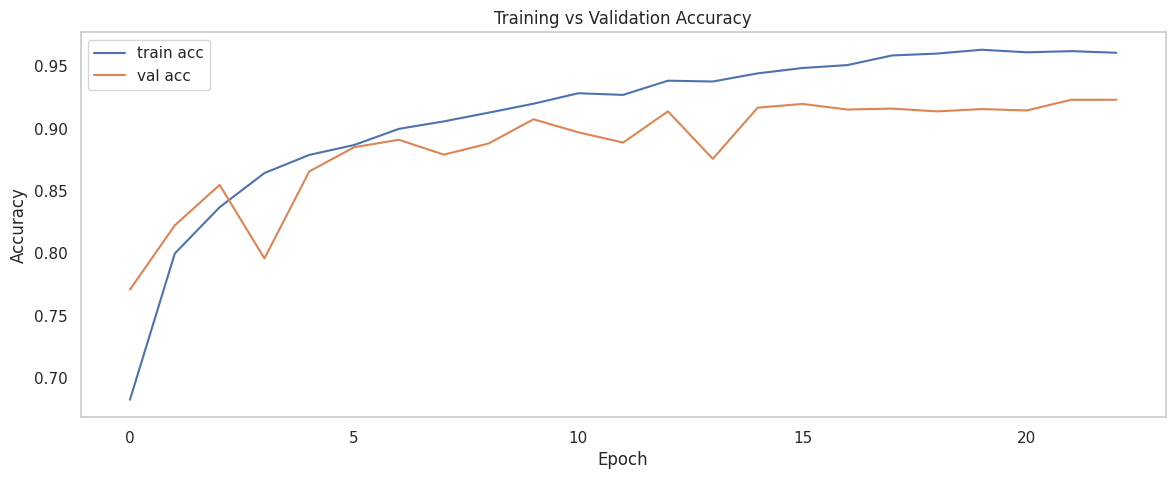

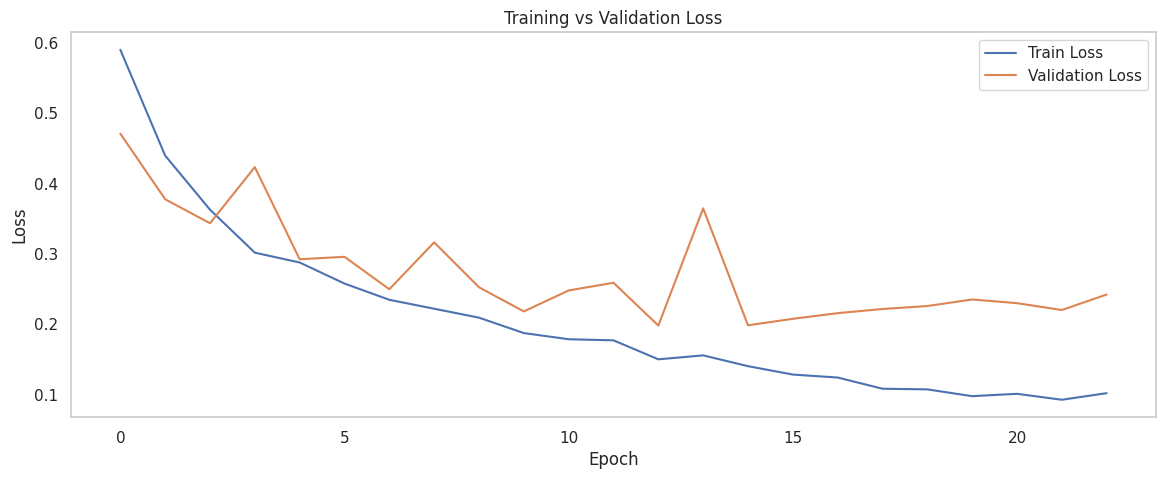

In [62]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [63]:
model = load_model("best_model.h5")

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

105/105 [==============================] - 1s 6ms/step - loss: 0.2355 - accuracy: 0.9233
Test Accuracy: 0.9233, Test Loss: 0.2355


In [64]:
class_names = le.inverse_transform(np.arange(num_classes))

In [65]:
class_names

array(['ADHD', 'Control'], dtype='<U7')

In [66]:
y_pred

array([[9.9933952e-01],
       [7.6363835e-07],
       [9.9953258e-01],
       ...,
       [4.3199558e-02],
       [1.3926194e-07],
       [9.9939370e-01]], dtype=float32)

In [67]:
model = load_model("best_model.h5")

105/105 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1869
           1       0.91      0.91      0.91      1481

    accuracy                           0.92      3350
   macro avg       0.92      0.92      0.92      3350
weighted avg       0.92      0.92      0.92      3350



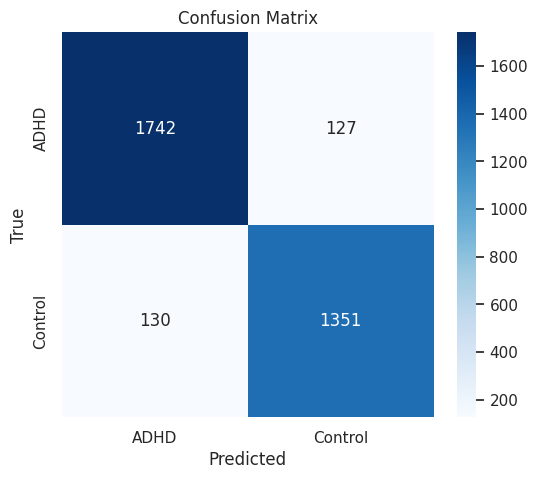

In [68]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()

y_true = y_test.flatten() if y_test.ndim > 1 else y_test

print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [69]:
y_score = model.predict(X_test)

105/105 [==============================] - 0s 4ms/step


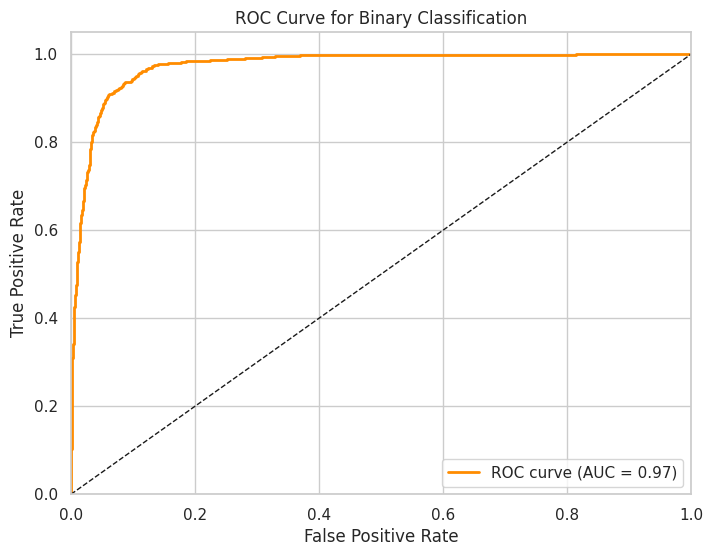

In [70]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

105/105 [==============================] - 1s 4ms/step


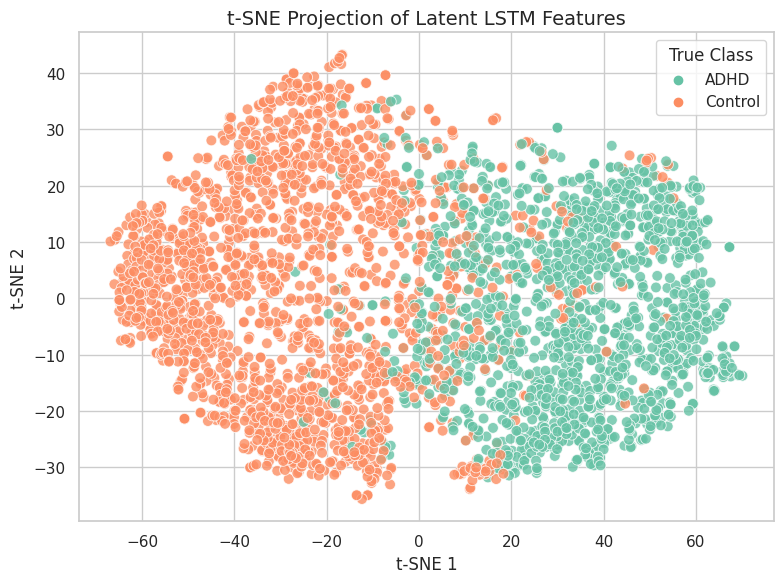

In [71]:
# The variable Name Changes Everytime the model is build. So If in case this code is to be run then the string 'lstm' should be replaced with the correct layer name which will be displayed in the error.
intermediate_model = Model(inputs=model.input, outputs=model.get_layer('lstm').output) 
 
X_latent = intermediate_model.predict(X_test)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_proj = tsne.fit_transform(X_latent)

y_true = y_test
class_names = ['Control', 'ADHD']

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_proj[:, 0], y=tsne_proj[:, 1],
                hue=[class_names[i] for i in y_true],
                palette='Set2', s=60, alpha=0.8)
plt.title("t-SNE Projection of Latent LSTM Features", fontsize=14)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title='True Class')
plt.grid(True)
plt.tight_layout()
plt.show()


Comparison with a Baseline SVM Model

In [72]:
if X_train.ndim == 3:
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_val_flat = X_val.reshape(X_val.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)
else:
    X_train_flat = X_train
    X_val_flat = X_val
    X_test_flat = X_test

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_flat, y_train)

y_val_pred = svm_model.predict(X_val_flat)
y_test_pred = svm_model.predict(X_test_flat)

print("Validation Set Evaluation")
print("--------------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_val, y_val_pred))

print("\nTest Set Evaluation")
print("-------------------")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_test_pred))